In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [59]:
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


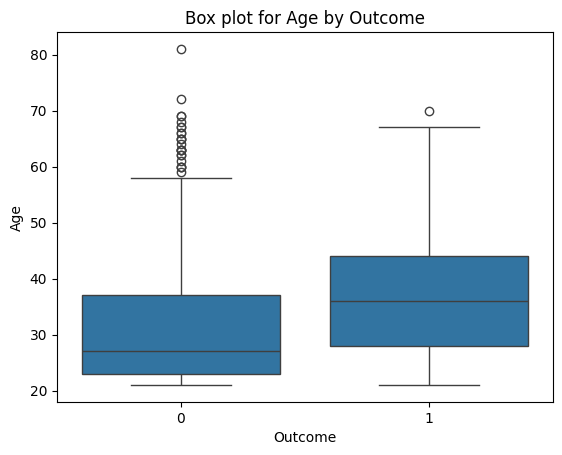

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'diabetes' is your DataFrame
feature_to_plot = 'Age'

sns.boxplot(x='Outcome', y=feature_to_plot, data=diabetes)
plt.title(f'Box plot for {feature_to_plot} by Outcome')
plt.show()


<Axes: >

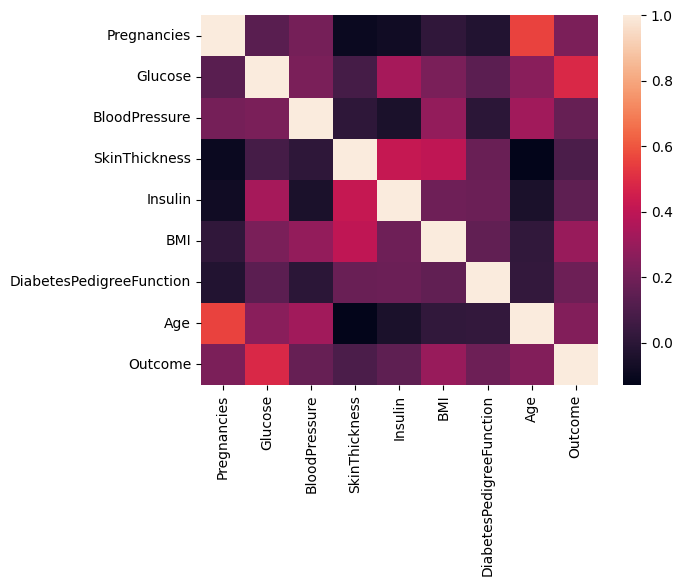

In [31]:
sns.heatmap(diabetes_mod.corr())

In [33]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                  0.627000  50.0      1.0  
1                  0.351000  31.0      0.0  
2                  0.672000  32.0      1.0  
3                  0.167000  21.0      0.0  
4                  0.471876  33.0      1.0  


In [34]:
# Check for missing values in the cleaned dataset
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [56]:
# 1. Load the dataset
# Assuming 'diabetes.csv' is in the 'models' folder
data_path = './diabetes.csv'
diabetes = pd.read_csv(data_path)

In [57]:
# 2. Explore the dataset (Optional but useful for understanding)
print("Dataset Columns: ", diabetes.columns)
print("Dataset Head: ", diabetes.head())

Dataset Columns:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Dataset Head:     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [58]:
# 3. Split the data into features and target variable
X = diabetes.drop(columns='Outcome')  # 'Outcome' is the target variable
y = diabetes['Outcome']  # This is the label (1 for diabetic, 0 for non-diabetic)

In [60]:
# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# 5. Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Check for duplicate rows in the cleaned dataset
print(df.duplicated().sum())

0


In [63]:
# 6. Initialize the Logistic Regression model
diabetes_model = LogisticRegression()

In [64]:
# 7. Train the model
diabetes_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [65]:
# 8. Make predictions on the test data
y_pred = diabetes_model.predict(X_test_scaled)

In [66]:
# 9. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 75.32%


In [67]:
# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [69]:
# 10. Save the trained model to a .pkl file
model_path = './diabetes_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(diabetes_model, f)

In [70]:
# Save the scaler (since it's needed for future predictions)
scaler_path = './scaler.pkl'
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

print(f"Model saved as {model_path}")
print(f"Scaler saved as {scaler_path}")

Model saved as ./diabetes_model.pkl
Scaler saved as ./scaler.pkl
